# Car Evaluation
- Attributes: 
    - buying:   vhigh, high, med, low.
    - maint:    vhigh, high, med, low.
    - doors:    2, 3, 4, 5more.
    - persons:  2, 4, more.
    - lug_boot: small, med, big.
    - safety:   low, med, high.

- Class
    - unacc, acc, good, vgo, od

### Importing Packages

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

### Loading Dataset

In [86]:
df = pd.read_csv('car.data')
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


### Assigning columns


In [87]:
df_columns = ['buying','maint','doors','persons','lug_boot','safety','class'] 
df.columns = df_columns
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


## Exploratory data analysis

### Information about all Attributes
- Each attribute has dtype as object, with instance length of 1727. Having no NaN values inside them, and first 5 attributes will be considered for Features, and reamaining one will be considered as Label for our Machine learning model.

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


### Describing all Attributes
- Below table shows the unique values inside them along with top most category and frequncy.

In [89]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


### Checking for NaN values in Dataset
- All attributes have 0 NaN values.

In [90]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

### Checking for N-Unique values

In [91]:
df.nunique()

buying      4
maint       4
doors       4
persons     3
lug_boot    3
safety      3
class       4
dtype: int64

### Checking for value counts

In [92]:
df.value_counts()

buying  maint  doors  persons  lug_boot  safety  class
high    high   2      2        big       high    unacc    1
med     med    4      more     small     med     acc      1
                                         high    acc      1
                               med       med     acc      1
                                         low     unacc    1
                                                         ..
low     low    3      2        med       med     unacc    1
                                         low     unacc    1
                                         high    unacc    1
                               big       med     unacc    1
vhigh   vhigh  5more  more     small     med     unacc    1
Length: 1727, dtype: int64

### Splitting into Features and label

In [93]:
df_features = df.drop('class',axis=1)
df_label = df[['class']]
print(df_features.shape,df_label.shape)
print(df_label.value_counts())

(1727, 6) (1727, 1)
class
unacc    1209
acc       384
good       69
vgood      65
dtype: int64


## Data Preprocessing

### Performing Encoding on Dataset

In [94]:
ordinal_encoder = OrdinalEncoder()
df_features_encoded = ordinal_encoder.fit_transform(df_features)
df_label_encoded = ordinal_encoder.fit_transform(df_label)
print(df_features_encoded.shape,df_label_encoded.shape)
df_features_encoded = pd.DataFrame(df_features_encoded,columns=df_features.columns)
df_label_encoded = pd.DataFrame(df_label_encoded,columns=df_label.columns)

(1727, 6) (1727, 1)


### Checking for Correlation

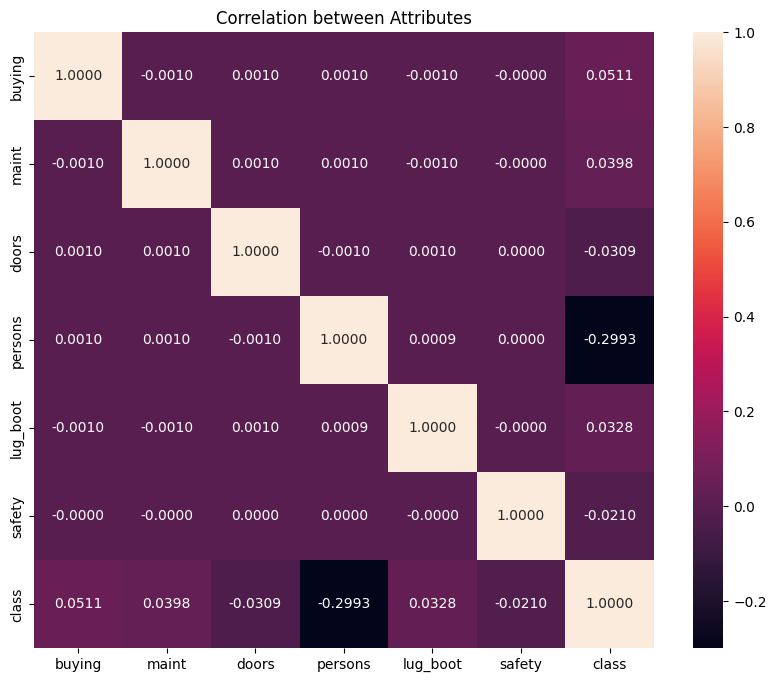

In [95]:
df_correlations = pd.concat([df_features_encoded,df_label_encoded],axis=1).corr()
plt.figure(figsize=(10,8))
df_correlations_Plot = sns.heatmap(df_correlations,annot=True,fmt='.4f')
plt.title("Correlation between Attributes")
plt.show()

### Tranformation Pipelines
- In this tranformation pipeline we are giving two estimators, which will be applied on our dataset. First one is Encoder and second one is Scaler. These two will encode and scale the data.

In [96]:
full_pipeline = Pipeline([
    ('encoder',OrdinalEncoder()),
    ('scaler',StandardScaler())
])
df_features_prepared = full_pipeline.fit_transform(df_features)
df_label_prepared = full_pipeline.fit_transform(df_label)

df_features_prepared = pd.DataFrame(df_features_prepared,columns=df_features.columns)
df_label_prepared = pd.DataFrame(df_label_prepared,columns=df_label.columns)

### Splitting Features and Label into Train test split
- Train test split we are passing two argument first is X variable as (df_features_prepared) and second is (df_label_encoded) the reason we are not using df_label_prepared is while building machine learning model, labels are unlikely to be normalized for that reason we are using only encoded label without stndardization.

In [97]:
X_train, X_test, y_train, y_test = train_test_split(df_features_prepared,df_label_encoded,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)
print(y_train.nunique(),y_train.value_counts())

(1381, 6) (346, 6)
(1381, 1) (346, 1)
class    4
dtype: int64 class
2.0      972
0.0      307
1.0       54
3.0       48
dtype: int64


### `Note:` Machine learning Data preprocessing project has done for car evaluation for more projects visit: www.github.com/itechdp